In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

In [2]:
pip install TextBlob


     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     ----- --------------------------------- 81.9/636.8 kB 2.3 MB/s eta 0:00:01
     --------- ---------------------------- 163.8/636.8 kB 2.0 MB/s eta 0:00:01
     ----------- -------------------------- 194.6/636.8 kB 1.3 MB/s eta 0:00:01
     --------------- ---------------------- 256.0/636.8 kB 1.3 MB/s eta 0:00:01
     ---------------- --------------------- 276.5/636.8 kB 1.3 MB/s eta 0:00:01
     ------------------- ------------------ 327.7/636.8 kB 1.2 MB/s eta 0:00:01
     --------------------- ---------------- 358.4/636.8 kB 1.1 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/636.8 kB 1.1 MB/s eta 0:00:01
     -------------------------- ----------- 440.3/636.8 kB 1.1 MB/s eta 0:00:01
     ----------------------------- -------- 501.8/636.8 kB 1.0 MB/s eta 0:00:01
     ---------------------------------- --- 583.7/636.8 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  63

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from textblob import TextBlob

In [8]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Lenovo\\Documents\\Internship\\twitter_training.csv')

In [9]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
df.shape

(74681, 4)

In [12]:
c_names = ['ID', 'Entity', 'Sentiment', 'text'] 
df = pd.read_csv('C:\\Users\\Lenovo\\Documents\\Internship\\twitter_training.csv', names=c_names)

In [13]:
df.head()

,ID,Entity,Sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [15]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
text         686
dtype: int64

In [16]:
df.dropna(axis=0 , inplace=True)

In [17]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
text         0
dtype: int64

In [18]:
# Define a function to calculate the sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

In [19]:
# Calculate the sentiment for each tweet
#df['polarity'], df['subjectivity'] = zip(*df['text'].apply(lambda x: get_sentiment(' '.join(x))))
df['polarity'], df['subjectivity'] = zip(*df['text'].apply(get_sentiment))

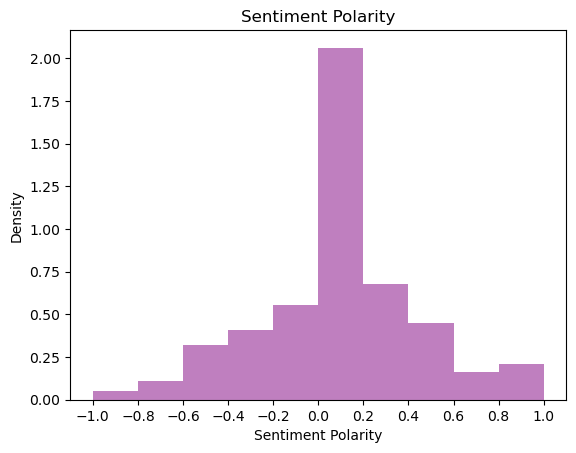

In [27]:
# Define a function to create a histogram of sentiment polarity
def plot_polarity_histogram(data, title='Sentiment Polarity'):
    _, bins, _ = plt.hist(data['polarity'], bins=10, alpha=0.5, density=True, color=['purple'])
    plt.title(title)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Density')
    plt.xticks(bins)
    
# Plot the sentiment polarity histogram
plot_polarity_histogram(df)    

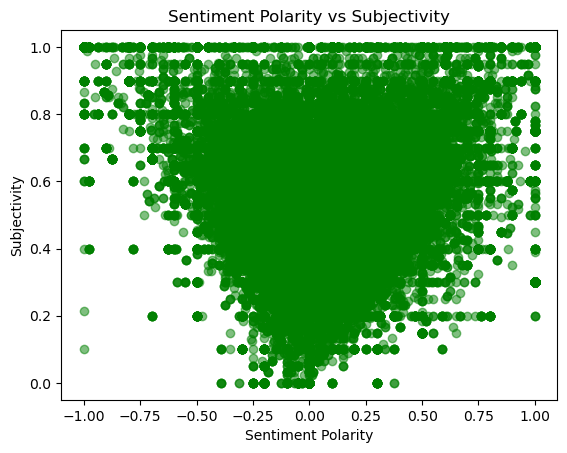

In [28]:
# Define a function to create a scatter plot of sentiment polarity vs subjectivity
def plot_polarity_subjectivity_scatter(data, title='Sentiment Polarity vs Subjectivity'):
    plt.title(title)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Subjectivity')
    plt.scatter(data['polarity'], data['subjectivity'], alpha=0.5, color=['green'])

# Plot the sentiment polarity vs subjectivity scatter plot
plot_polarity_subjectivity_scatter(df)

IndexError: index 3 is out of bounds for axis 1 with size 3

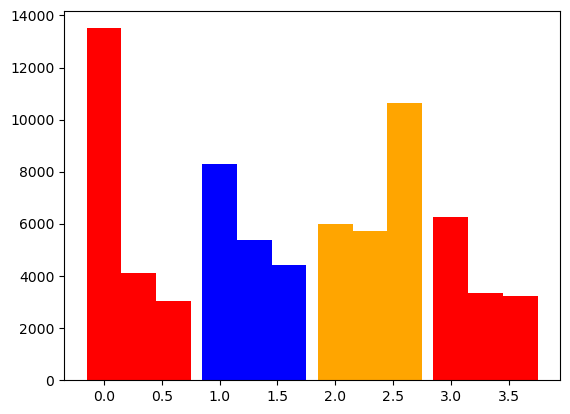

In [30]:
# Define a function to create a bar chart of sentiment distribution by target
def plot_sentiment_bar_chart(data, title='Sentiment Distribution by Target'):
    targets = data['Sentiment'].unique()
    sentiments = ['positive', 'neutral', 'negative']
    counts = []
    for target in targets:
        subset = data[data['Sentiment'] == target]
        subcounts = [len(subset[subset['polarity'] > 0]), len(subset[subset['polarity'] == 0]), len(subset[subset['polarity'] < 0])]
        counts.append(subcounts)
    counts = np.array(counts)
    labels = ['Positive', 'Neutral', 'Negative']
    width = 0.3
    x = np.arange(len(targets))
    fig, ax = plt.subplots()
    for i, target in enumerate(targets):
        ax.bar(x + i * width, counts[:, i], width, label=target,color=['red','blue','orange'])
    ax.set_xticks(x + width * 0.5)
    ax.set_xticklabels(targets, rotation=45)
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.legend()

# Plot the sentiment distribution bar chart
plot_sentiment_bar_chart(df)

In [23]:
sentiment_counts = df['Sentiment'].value_counts() 
sentiment_counts

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

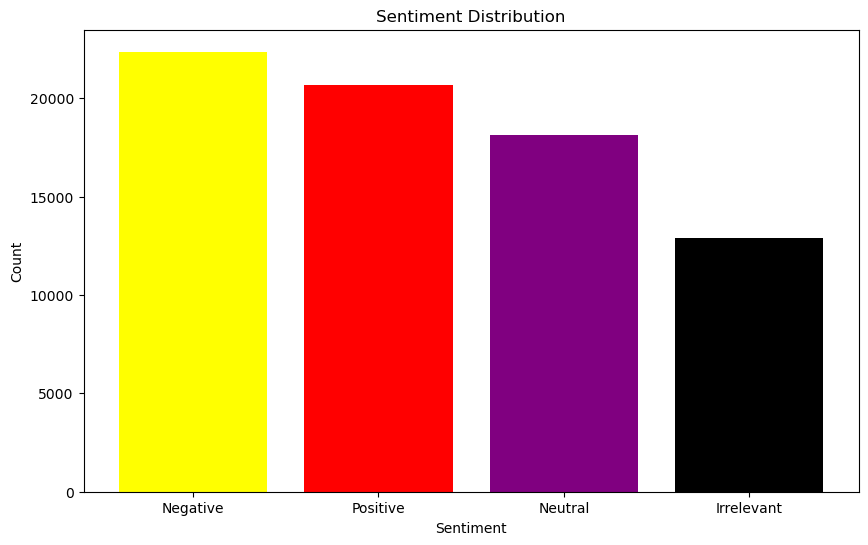

In [26]:
# Visualize the sentiment distribution
plt.figure(figsize=(10,6))
plt.bar(df['Sentiment'].value_counts().index, df['Sentiment'].value_counts(), color=['yellow', 'red', 'purple','black'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [31]:
# Filter the sentiment analysis data based on the specific entity
entity_sentiment_data = df[df['Entity'] == 'Facebook']

# Calculate the number of tweets for each sentiment category
entity_sentiment_counts = entity_sentiment_data['Sentiment'].value_counts()


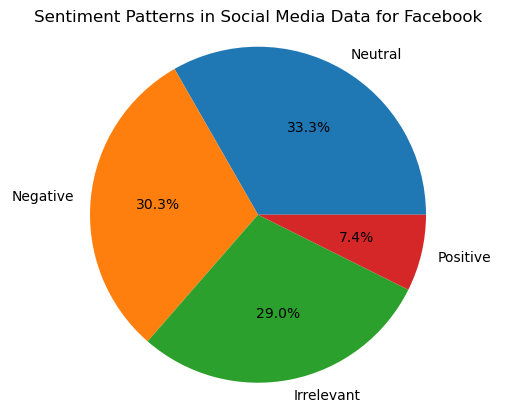

In [33]:
# Create a pie chart
plt.pie(entity_sentiment_counts, labels=entity_sentiment_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Patterns in Social Media Data for Facebook')
plt.show()

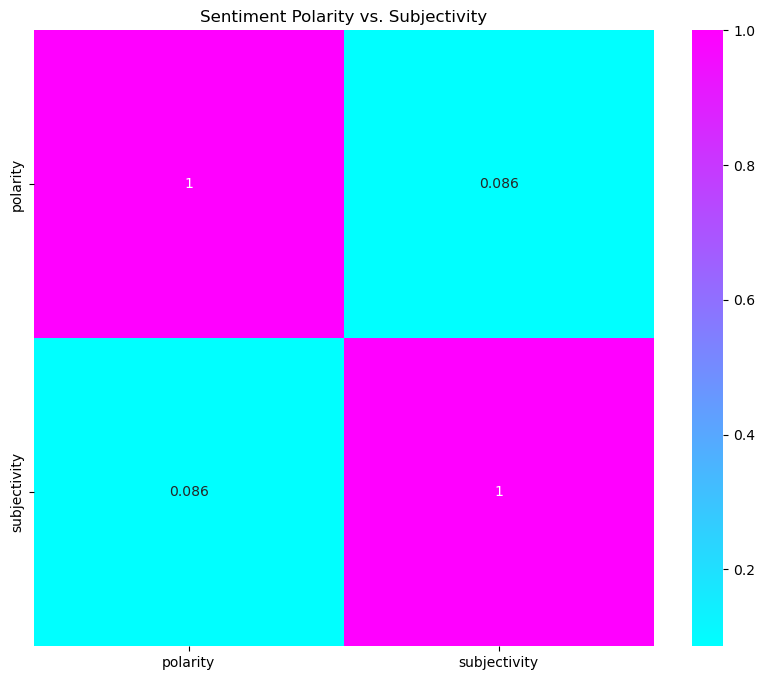

In [35]:
# Create a heatmap of the polarity and subjectivity values
plt.figure(figsize=(10, 8))
sn.heatmap(df[['polarity', 'subjectivity']].corr(), annot=True, cmap='cool')
plt.title('Sentiment Polarity vs. Subjectivity')
plt.show()